# 確率変数

## 1. 確率変数と確率分布

### 例 1.1 (表の出た回数)
　1枚のコインが存在し, そのコインを投げた際に表と裏のどちらかをし, 表と裏を示す確率は等しいものとする. そのコインを連続で5回投げた際に出た表の回数ごとに確率を計算すると以下の通りである.

| 表の回数 $X$       | $0$             | $1$             | $2$             | $3$             | $4$             | $5$             |
| ---------------- | --------------- | --------------- | --------------- | --------------- | --------------- | --------------- |
| 確率 ${\rm P}(X)$ | $\dfrac{1}{32}$ | $\dfrac{5}{32}$ | $\dfrac{5}{16}$ | $\dfrac{5}{16}$ | $\dfrac{5}{32}$ | $\dfrac{1}{32}$ |


この時, 「コインを投げた際に出た表の回数」という現象を割り当てられた表の回数 $X$ のことを **確率変数** (random variable) という. また確率変数ごとに割り当てられた確率全体を表したものを **確率分布** (probability distribution) という.

### 定義 1.2 (離散型確率分布)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

$\{x_1, x_2, \cdots, x_m, m \in \mathbb{N}\}$ の中の値をとる確率変数 $X$ を**離散型** (discrete type) と呼び, それぞれの値の確率

$$
    {\rm P}(X = x_k) = f(x_k)
$$

を $X$ の**確率分布** (probability distribution) という. $f$ は


<a id="math-1.2"></a>
<a id="math-1.3"></a>

(discrete-distribution)=
$$
    \begin{align}
        & f(x_k) \geq 0 \quad (k = 1, 2, \cdots) \\
        & \sum_{ k=0 }^{ n }{ f(x_k) } = 1
    \end{align}
$$

の条件を満たす. この $f$ を**確率質量関数** (probability mass function, pmf) という.

</div>

### 定義 1.3 (連続型確率分布)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　確率変数 $X$ が連続値を取る場合, **連続型** (continuous type) と呼び, 取りうる区間で確率分布が定義される.

$$
    {\rm P}(a \leq X \leq b) = \int_{a}^{b}{f(x)dx}
$$

$f$ は,

<a id="math-1.5"></a>
<a id="math-1.6"></a>

(continuous-distribution)=
$$
    \begin{align}
        & f(x_k) \geq 0 \quad (x \in \mathbb{R}) \\
        & \int_{- \infty}^{\infty}{f(x)dx} = 1 
    \end{align}
$$

であるものとする. この $f$ を $X$ の**確率密度関数** (probability density function, pdf) という.

</div>

### 定義 1.4 (累積分布関数)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　確率変数 $X$ に対して, $x$ を実数とするとき $x$ 以下の確率

$$
    F(x) = {\rm P}(X \geq x)
$$

を $X$ の**累積分布関数** (cumulative distribution function, cdf) と呼ぶ.

</div>

### 定理 1.5 (離散型・連続型それぞれの累積分布関数)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　離散型の確率変数の場合, 確率質量関数 $f(x)$ を用いて $-\infty$ から $x$ までの積み上げたものとなり以下のように書ける.

$$
    F(x) = \sum_{u \geq x}{f(u)}
$$

　また, 連続型の確率変数の場合, 確率密度関数 $f(x)$ を用いて
 
$$
    F(x) = \int_{-\infty}^{x}{f(u)du}
$$

となる. また, 微分積分学の基本定理より $F(x)$ から密度関数 $f(x)$ が求められる.

$$
    F'(x) = \frac{d}{dx} \int_{-\infty}^{x}{f(u)du} = f(x)
$$

</div>

### 例 1.6 (pythonで離散型累積分布関数の確認)

　例 1.1.1 で挙げたコインの表の回数に関する分布を再考する. 表の出る回数を $x (x = 0,1, \cdots, 5)$ とした時に $f(x) = {\rm P}(X=x)$ は以下のように書ける.

$$
    f(x) = {}_5{\rm C}_{5-x} \biggl( \frac{1}{2} \biggr)^x \biggl( 1-\frac{1}{2} \biggr)^{5-x} = {}_5{\rm C}_{5-x} \biggl( \frac{1}{2} \biggr)^5 = \frac{{}_5{\rm C}_{5-x}}{32}
$$

後述するが, この確率質量関数によって表現される分布を**二項分布** (binomial distribution) といい, python の [SciPy](https://docs.scipy.org/doc/scipy/index.html) にある [`scipy.stats.binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) を用いて分布に従った確率変数を生成できる.

二項分布の確率
SciPy: 0.31249999999999983
理論値: 0.3125
差分: 1.6653345369377348e-16

二項分布の確率質量関数と累積分布関数


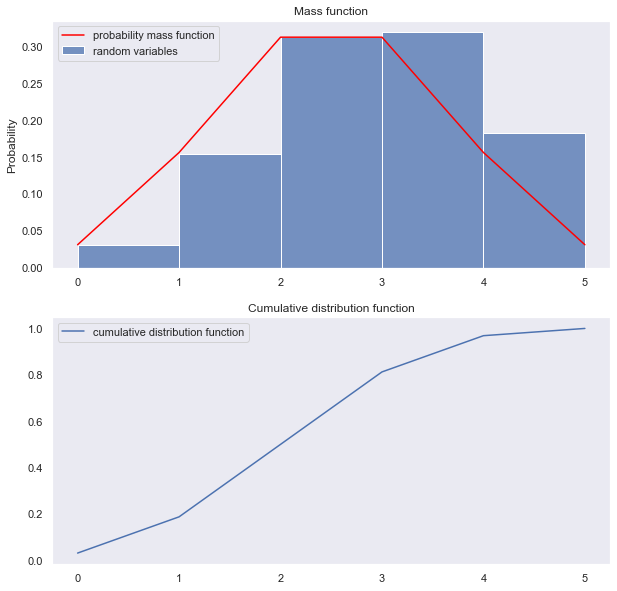

In [1]:
# 必要なモジュールのインポート.
%matplotlib inline

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 表が出る確率 p = 0.5 のコインを n = 5回投げるものとする.
p, n = 0.5, 5

# 表が2回出る確率を求める (理論値は 5/16).
# SciPy は疑似乱数から分布を生成しているが理論値とほとんど一致していることが分かる.
prob_2 = binom.pmf(n=n, p=p, k=2)

print("======================================")
print("二項分布の確率")
print("======================================")
print(f"SciPy: {prob_2}")
print(f"理論値: {5/16}")
print(f"差分: {5/16 - prob_2}")

# 二項分布に従う乱数列の生成
# 「表が出る確率 p = 0.5 のコインを n = 5回投げる」分布に従った疑似乱数を size=10000 個生成する.
size = 10000
np.random.seed(1)
rvs = binom.rvs(n=n, p=p, size=size)

# 確率分布を取得してプロットするため, 回数を表す横軸 (x) とそれに対応する確率質量関数の値 (y) を取得する.
x = np.arange(0, 6, 1)
y = binom.pmf(n=n, p=p, k=x)

# 可視化
print("")
print("======================================")
print("二項分布の確率質量関数と累積分布関数")
print("======================================")
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
sns.histplot(rvs, bins=x, stat="probability", kde=False, label="random variables", ax=ax1)
ax1.plot(x, y, label="probability mass function", color="red")
ax1.set_xticks(x)
ax1.set_title("Mass function")
ax1.legend()
ax1.grid()

# 累積分布関数
cdf = binom.cdf(n=n, p=p, k=x)

ax2 = fig.add_subplot(212)
ax2.plot(x, cdf, label="cumulative distribution function")
ax2.set_xticks(x)
ax2.set_title("Cumulative distribution function")
ax2.legend()
ax2.grid()

### 例 1.7 (pythonで連続型累積分布関数の確認)

　連続型の確率分布で最も有名な**正規分布** (normal distribution, ガウス分布 \<Gaussina distribution\> とも呼ばれる) について考える.  
　日本の17歳男子の身長の平均は170.7 cmで, その標準偏差が5.8の正規分布に従うとされており, ここでは簡単なために平均値 $\mu=170$, 標準偏差 $\sigma=6$ として考える. この時, 以下の確率密度関数で表現することができる.

$$
    f(x) = \frac{1}{\sqrt{2 \pi \cdot 6^2 }} \exp{ \biggl( - \frac{(x-170)^2}{2 \cdot 6^2} \biggr) }
$$

これは [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) によって正規分布に従った乱数を生成できる.


正規分布の確率質量関数と累積分布関数


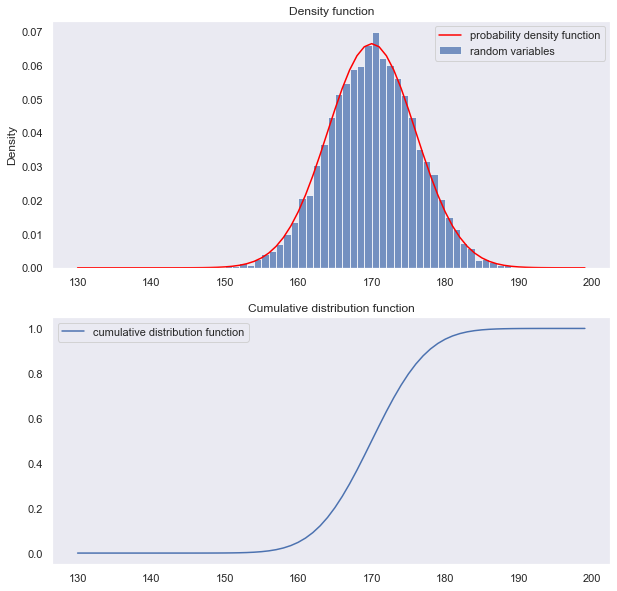

In [2]:
%matplotlib inline

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 正規分布に従う乱数列の生成
loc = 170
scale = 6
size = 10000
rvs = norm.rvs(loc=loc, scale=scale, size=size)

# 確率分布を取得してプロットするため, 回数を表す横軸 (x) とそれに対応する確率質量関数の値 (y) を取得する.
x = np.arange(130, 200, 1)
y = norm.pdf(x=x, loc=loc, scale=scale)

# 可視化
print("")
print("======================================")
print("正規分布の確率質量関数と累積分布関数")
print("======================================")
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
sns.histplot(rvs, bins=x, stat="density", kde=False, label="random variables", ax=ax1)
ax1.plot(x, y, label="probability density function", color="red")

ax1.set_title("Density function")
ax1.legend()
ax1.grid()

# 累積分布関数
cdf = norm.cdf(x=x, loc=loc, scale=scale)

ax2 = fig.add_subplot(212)
ax2.plot(x, cdf, label="cumulative distribution function")
ax2.set_title("Cumulative distribution function")
ax2.legend()
ax2.grid()

## 2. 期待値と分散

### 定義 2.1 (期待値)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　確率変数 $X$ に対して ${\rm E}(X)$ を**期待値** (expectation) といい

<a id="math-1.13"></a>
<a id="math-1.14"></a>
    
(expectation)=
$$
    \begin{align}
        &(離散型) \quad {\rm E}(X) = \sum_{ x }{ xf(x) } \\
        &(連続型) \quad {\rm E}(X) = \int_{ -\infty }^{ \infty }{ xf(x)dx }
    \end{align}
$$

と書ける. ただし $f$ は離散型の場合は確率質量関数, 連続型の場合は確率密度関数を示す.
　また, $X$ の関数 $\phi(X)$ についても同様に期待値は定義でき以下の通りである.

<a id="math-1.15"></a>
<a id="math-1.16"></a>

$$
    \begin{align}
        &(離散型) \quad {\rm E}(X) = \sum_{ x }{ \phi(x)f(x) } \\
        &(連続型) \quad {\rm E}(X) = \int_{ -\infty }^{ \infty }{ \phi(x)f(x)dx }
    \end{align}
$$

</div>

### 例 2.2 (期待値の具体例)

　例 1.1.1 のケースの期待値の計算は以下の通りとなる.
 
$$
    {\rm E}(X) = 0 \times \frac{1}{32} + 1 \times \frac{5}{32} + 2 \times \frac{10}{32} + 3 \times \frac{10}{32} + 4 \times \frac{5}{32} + 5 \times \frac{1}{32} = \frac{5}{2}
$$

　また連続型の分布のうち指数分布があり

$$
    f(x) = 
    \begin{cases}
        \lambda e^{-\lambda x} & (x \geq 0) \\
        0 & (x \le 0)
    \end{cases}
$$

と書ける. ただし $\lambda > 0$ である. この時の期待値は

$$
    \begin{align}
        {\rm E}(X) 
            &= \int_{ -\infty }^{ 0 }{ x \cdot 0dx} + \int_{ 0 }^{ \infty }{ x \lambda e^{-\lambda x} dx} \\
            &= 0 + \int_{ 0 }^{ \infty }{ \lambda e^{-\lambda x} dx} - \frac{1}{ \lambda } \Bigl[ x \lambda e^{-\lambda x} \Bigr]_{0}^{ \infty } \\
            &= - \frac{1}{\lambda} \Bigl[ \lambda e^{-\lambda x} \Bigr]_{0}^{ \infty } \\
            &= \frac{1}{\lambda}
    \end{align}
$$

となる. 計算には部分積分を用いて実施した. ([WolframAlpha](https://ja.wolframalpha.com/input?i2d=true&i=Integrate%5BxλExp%5B-λx%5D%2C%7Bx%2C0%2C∞%7D%5D) を用いると上の結果はすぐに導ける.)

### 命題 2.3 (期待値の性質)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　期待値の演算について確率変数 $X, Y$ について以下の性質が成立する. ただし, $c$ は定数とする.

<a id="math-1.17"></a>

(expectation-property)=
$$
    \begin{align}
        & {\rm E}(c) = c \\
        & {\rm E}(X + c) = {\rm E}(X) + c \\
        & {\rm E}(cX) = c{\rm E}(X)  \\
        & {\rm E}(X + Y) = {\rm E}(X) + {\rm E}(Y)
    \end{align}
$$

</div>

### 定義 2.4 (分散)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　確率変数 $X$ に対して ${\rm Var}(X)$ を**分散** (variance) といい

$$
    \begin{align}
        &(離散型) \quad {\rm Var}(X) = \sum_{ x }{ (x - {\rm E}(X))^2f(x) } \\
        &(連続型) \quad {\rm Var}(X) = \int_{ -\infty }^{ \infty }{ (x - {\rm E}(X))^2f(x)dx }
    \end{align}
$$

</div>

ただし, 実際に分散を求める際には以下の等式を利用する方が楽である.

### 命題 2.5 (分散と期待値の関係式)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　分散と期待値の間には以下の関係が成立する.

<a id="math-1.20"></a>
(expect-variance)=
$$
    \begin{align}
        {\rm Var}(X) = {\rm E}(X^2) - ({\rm E}(X))^2
    \end{align}
$$

</div>

<u>証明</u>

　離散型, 連続型いずれにおいても

$$
{\rm Var}(X) = {\rm E}(X^2) - 2({\rm E}(X))^2 + ({\rm E}(X))^2 = {\rm E}(X^2) - ({\rm E}(X))^2
$$

と計算できる.

### 命題 2.6 (分散の性質)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　分散の演算について確率変数 $X$ について以下の性質が成立する. ただし, $c$ は定数とする.

(variance-property)=
$$
    \begin{align}
        & {\rm Var}(c) = 0 \\
        & {\rm Var}(X + c) = {\rm Var}(X) \\
        & {\rm Var}(cX) = c^2{\rm Var}(X)
    \end{align}
$$

</div>

## 3. モーメントと積率母関数

　期待値を $\mu$, 標準偏差 (分散のルート値) を $\sigma$ とする.

### 定義 3.1 (歪度)
 
<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　非対称性の指標として**歪度** (skewness) と呼び, 以下のように定義する.

$$
    \begin{align}
        \alpha_3 = \frac{ {\rm E}(X-\mu)^3 }{\sigma^3}
    \end{align}
$$

</div>

　$\alpha_3 > 0$ ならば右の裾が長く, $\alpha_3 < 0$ ならば左に裾が長い. $|\alpha_3|$ がその程度を表す.

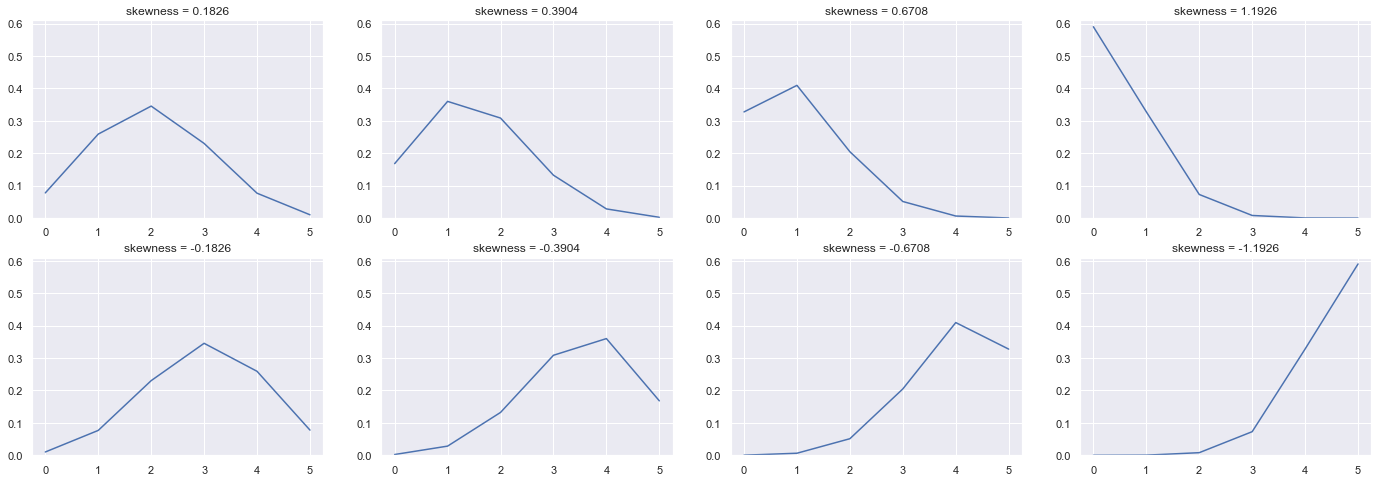

In [3]:
# -------------------------------
# 歪度による二項分布の形状
# -------------------------------

%matplotlib inline

from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

# 二項分布に関する python モジュールの使い方については後述.
n = 5
p_list = np.arange(0.2, 0.4, 0.05)

# x軸
x = np.arange(0, n + 1, 1)

# 図の定義
fig = plt.figure(figsize=(24, 8))

i = 1
for p in [0.4, 0.3, 0.2, 0.1, 0.6, 0.7, 0.8, 0.9]:
    ax1 = fig.add_subplot(2, 4, i)
    y = binom.pmf(k=x, n=n, p=p)
    s = binom.stats(n=n, p=p, moments="s")
    ax1.plot(x, y)
    
    title = f"skewness = {np.round(s, 4)}"
    ax1.set_title(title)
    ax1.set_ylim(0, 0.61)
    
    i += 1

### 定義 3.2 (尖度)
 
<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　確率分布の尖り具合の程度については以下を用いる.

$$
    \begin{align}
        \alpha_4 = \frac{ {\rm E}(X-\mu)^4}{\sigma^4}
    \end{align}
$$

</div>

　また, **尖度** (kurtosis) は正規分布の $\alpha_4 = 3$ と比較して $\alpha_4 - 3$ として定義し, $\alpha_4 - 3 > 0$ ならば正規分布より尖っており, $\alpha_4 - 3 < 0$ ならば正規分布より丸く鈍い形をしている.

Text(0.5, 1.0, 'kurtosis = 6.0')

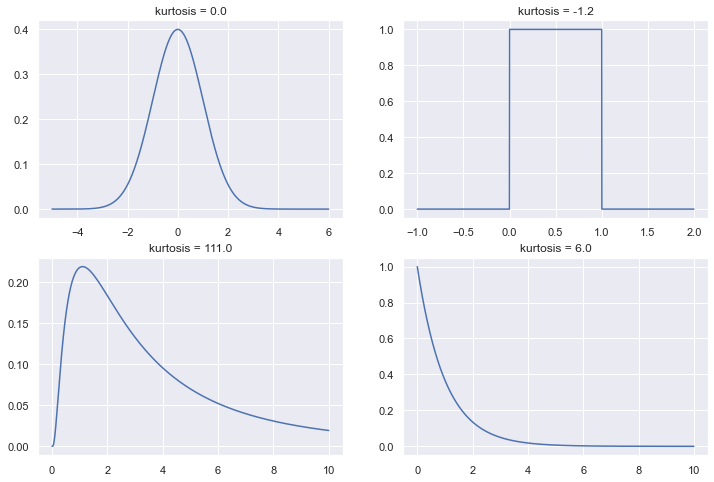

In [4]:
# -------------------------------
# 歪度による二項分布の形状
# -------------------------------

%matplotlib inline

from scipy.stats import norm, uniform, lognorm, expon
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

# 正規分布
ax = fig.add_subplot(2, 2, 1)
x = np.arange(-5, 6, 0.001)
y = norm.pdf(x=x)
ax.plot(x, y)
k = norm.stats(moments="k")
ax.set_title(f"kurtosis = {k}")

# 連続一様分布
ax = fig.add_subplot(2, 2, 2)
x = np.arange(-1, 2, 0.001)
y = uniform.pdf(x=x)
ax.plot(x, y)
k = uniform.stats(moments="k")
ax.set_title(f"kurtosis = {k}")

# 対数正規分布
ax = fig.add_subplot(2, 2, 3)
x = np.arange(0.001, 10, 0.001)
y = lognorm.pdf(x=x, s=1, scale=3)
ax.plot(x, y)
k = lognorm.stats(s=1, scale=3, moments="k")
ax.set_title(f"kurtosis = {np.round(k)}")

# 指数分布
ax = fig.add_subplot(2, 2, 4)
x = np.arange(0, 10, 0.001)
y = expon.pdf(x=x)
ax.plot(x, y)
k = expon.stats(moments="k")
ax.set_title(f"kurtosis = {k}")

### 定義 3.3 (モーメント)
　確率分布の形は ${\rm E}(X - \mu)^r$ となる量, あるいは ${\rm E}(X^r)$ によって決まってくる.
 
<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　一般に以下を $X$ の**原点周りの** $r$ 次の **モーメント** (moment), または**積率**という.

$$
    \begin{align}
        \mu_r = {\rm E}(X^r)
    \end{align}
$$

また以下を $X$ の**期待値 (平均) の周りの** $r$ 次の **モーメント** (moment) という.

$$
    \begin{align}
        \mu'_r = {\rm E}(X - \mu)^r
    \end{align}
$$

また

$$
    \begin{align}
        \alpha_r = \frac{{\rm E}(X - \mu)^r}{\sigma^r}
    \end{align}
$$

を $X$ の $r$ 次の**標準化モーメント**と言われる.

</div>

### 定義 3.4 (積率母関数)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　全ての次数のモーメントを生成する関数を**積率母関数**または**モーメント母関数** (moment generating function) と言い, 以下のように定義される.

$$
    \begin{align}
        &(離散型) \quad M_t(X) = {\rm E}\bigl(e^{tX}\bigr) = \sum_{ x }{ e^{tx} f(x) } \\
        &(連続型) \quad M_t(X) = {\rm E}\bigl(e^{tX}\bigr) = \int_{ -\infty }^{ \infty }{ e^{tx} f(x)dx }
    \end{align}
$$

</div>

ただし, この定義で無限和, 積分が存在しないこともある.

### 命題 3.5 (積率母関数とモーメントとの関係)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　積率母関数とモーメントの間に以下の関係が成立する.

$$
    \begin{align}
        M_X^{(r)}(0) = \mu_r
    \end{align}
$$

ただし, $M_X^{(r)}(t)$ は $r$ 階導関数である.

</div>

<u>証明</u>

　e^x に対するマクローリン展開式は以下の通り.

$$
    e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

$x = tX$ を代入し

$$
    e^{tX} = 1 + tX + \frac{(tX)^2}{2!} + \frac{(tX)^3}{3!} + \cdots
$$

で, 両辺の期待値を取れば,

$$
    \begin{align}
        M_X(t) &= 1 + tE(X) + \frac{t^2E(X^2)}{2!} + \frac{t^3E(X^3)}{3!} + \cdots \\
               &= 1 + \mu_1t + \frac{\mu_2}{2!}t^2 + + \frac{\mu_3}{3!}t^3 + \cdots
    \end{align}
$$

ここで, $r (>0)$ 階導関数を求めると

$$
    \begin{align}
        M_X^{(r)}(t) &= \mu_r + \frac{\mu_{r+1}}{r+1}t + \frac{\mu_{r+2}}{(r+1)(r+2)}t^2 + \cdots
    \end{align}
$$

となるので, $t = 0$ を代入して求められる.

## 4. 確率変数の変換

### 定理 4.1 (確率変数の変換)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　確率変数 $X$を $Y = \phi(X)$ で変換した確率変数 $Y$ について, 確率変数 $X$, $Y$ それぞれの密度関数を $f(x)$, $g(y)$ と表す. この時,

$$
    \begin{align}
        g(y) = f \Bigl(\phi^{-1}(y) \Bigr) \left| \frac{d\phi^{-1}(y)}{dy} \right|
    \end{align}
$$

と書ける. ただし, $\phi^{-1}$ は $\phi$ の逆関数である.

</div>

<u>証明</u>

　$y = \phi(x)$ が単調増加であるとする. 区間 $(x, x + \varDelta x)$ が $\phi(x)$ によって $(y, y + \varDelta y)$ に移ったとする. また, $\varDelta y = \phi(x + \varDelta x) - \phi(x)$ とする. $\phi$ は単調増加関数より, $x \leq X \leq x + \varDelta x$ と $y \leq Y \leq y + \varDelta y$ は論理的に同値である. 従って,
 
$$
    \begin{align}
        P(y \leq Y \leq y + \varDelta y) = P(x \leq X \leq x + \varDelta x) \Rightarrow g(y) \left| \varDelta y \right| = f(x) \left| \varDelta x \right|
    \end{align}
$$

よって,

$$
    \begin{align}
        g(y) = f(x) \left| \frac{\varDelta x}{\varDelta y} \right| \stackrel{\varDelta \rightarrow 0}{=} f(x) \left| \frac{dx}{dy} \right|
    \end{align}
$$

また単調減少においては $(y, y - \varDelta y)$ に移ったものとし, $P(y \leq Y \leq y - \varDelta y) = P(x \leq X \leq x + \varDelta x) \Rightarrow g(y) \left| \varDelta y \right| = f(x) \left| \varDelta x \right|$ から同式を得られる.
　ここで $y = \phi(x) \Rightarrow \phi^{-1}(y) = x$ で代入すると目的の式を得られる.

(exmaple-normal-lognormal)=
### 例 4.2 (正規分布と対数正規分布)

　$x = \log{y}$ が正規分布に従うとする (詳細は [例 2.2 (正規分布)](normal-distribution) を参照のこと). この時,

$$
    f(x) = \frac{1}{\sqrt{2\pi} \sigma} \exp{ \biggl( - \frac{(x -\mu)^2}{2 \sigma^2} \biggr) }
$$

が成立する. $\dfrac{dx}{dy} = \dfrac{1}{y}$ なので

$$
    g(y) = f(x) \frac{1}{y} = \frac{1}{\sqrt{2\pi} \sigma y} \exp{ \biggl( - \frac{(\log{y} -\mu)^2}{2 \sigma^2} \biggr) }
$$

と分布関数が求められる.